Load required libraries

In [1]:
from netCDF4 import Dataset, num2date
import numpy as np
import pandas as pd
import xarray as xr
import os
import time
import matplotlib.pyplot as plt
import matplotlib
import gc
from matplotlib import transforms
import matplotlib.colors as clrs
import glob

Load in observation data

In [2]:
for i in np.arange(0,12):
    filename = "/home/stod000/space/DATA/SOCAT/SOCAT_monthly_"+str(i+1)+"_1962_to_2020_CREG025.nc"
    data = Dataset(filename, "r", format="NETCDF4")
    X = data.variables['fCO2water_SST_wet'][:]
    if i==0:
        [ny,nx]=np.shape(X)
        obsPCO2=np.zeros((12,ny,nx))
    obsPCO2[i,:,:]=X

print(type(obsPCO2))
print(np.shape(obsPCO2))


/tmp/ipykernel_151513/30887102.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = data.variables['fCO2water_SST_wet'][:]


<class 'numpy.ndarray'>
(12, 735, 528)


Load in model output data (only need to run this cell if you're making plots other than the books)

In [3]:
filein = ("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/processed_op/pco2/CREG025_LIM3_CANOE-VJC014l_monthly_pco2.nc")
data = Dataset(filein, "r", format="NETCDF4")
print(data)

modPCO2 = data.variables['pco2'][:]
print(np.shape(modPCO2))



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): x(528), y(735), time(12)
    variables(dimensions): float32 nav_lat(y, x), float32 nav_lon(y, x), float32 time(time), float32 pco2(time, y, x)
    groups: 
(12, 735, 528)


/tmp/ipykernel_151513/623026445.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]


Load region mask and CREG025 mask

In [4]:
data_file = Dataset("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/regions_mask_6.nc", "r", format="NETCDF4")
regindx = (data_file['regions_mask'][:])
print(regindx.shape)

data_file = Dataset("/home/fid000/WORK7/ANALYSIS/DATA/CREG025_mesh_mask.nc", "r", format="NETCDF4")
tmask = (data_file['tmask'][0,:,:,:])
print(tmask.shape)

print(np.nanmin(regindx),np.nanmean(regindx),np.nanmax(regindx))
print(np.min(tmask),np.mean(tmask),np.max(tmask))

tmask0=tmask[0,:,:].squeeze()

nxy=np.size(regindx)
I = np.reshape(regindx, (nxy,))
nreg=int(max(I))
mask = regindx
mask = mask.flatten()

/tmp/ipykernel_151513/2096643997.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  regindx = (data_file['regions_mask'][:])


(735, 528)


/tmp/ipykernel_151513/2096643997.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tmask = (data_file['tmask'][0,:,:,:])


(75, 735, 528)
0.0 2.0095472683383417 9.0
0 0.3011297327011613 1


Output scatterplots of model vs obs for month and regions

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

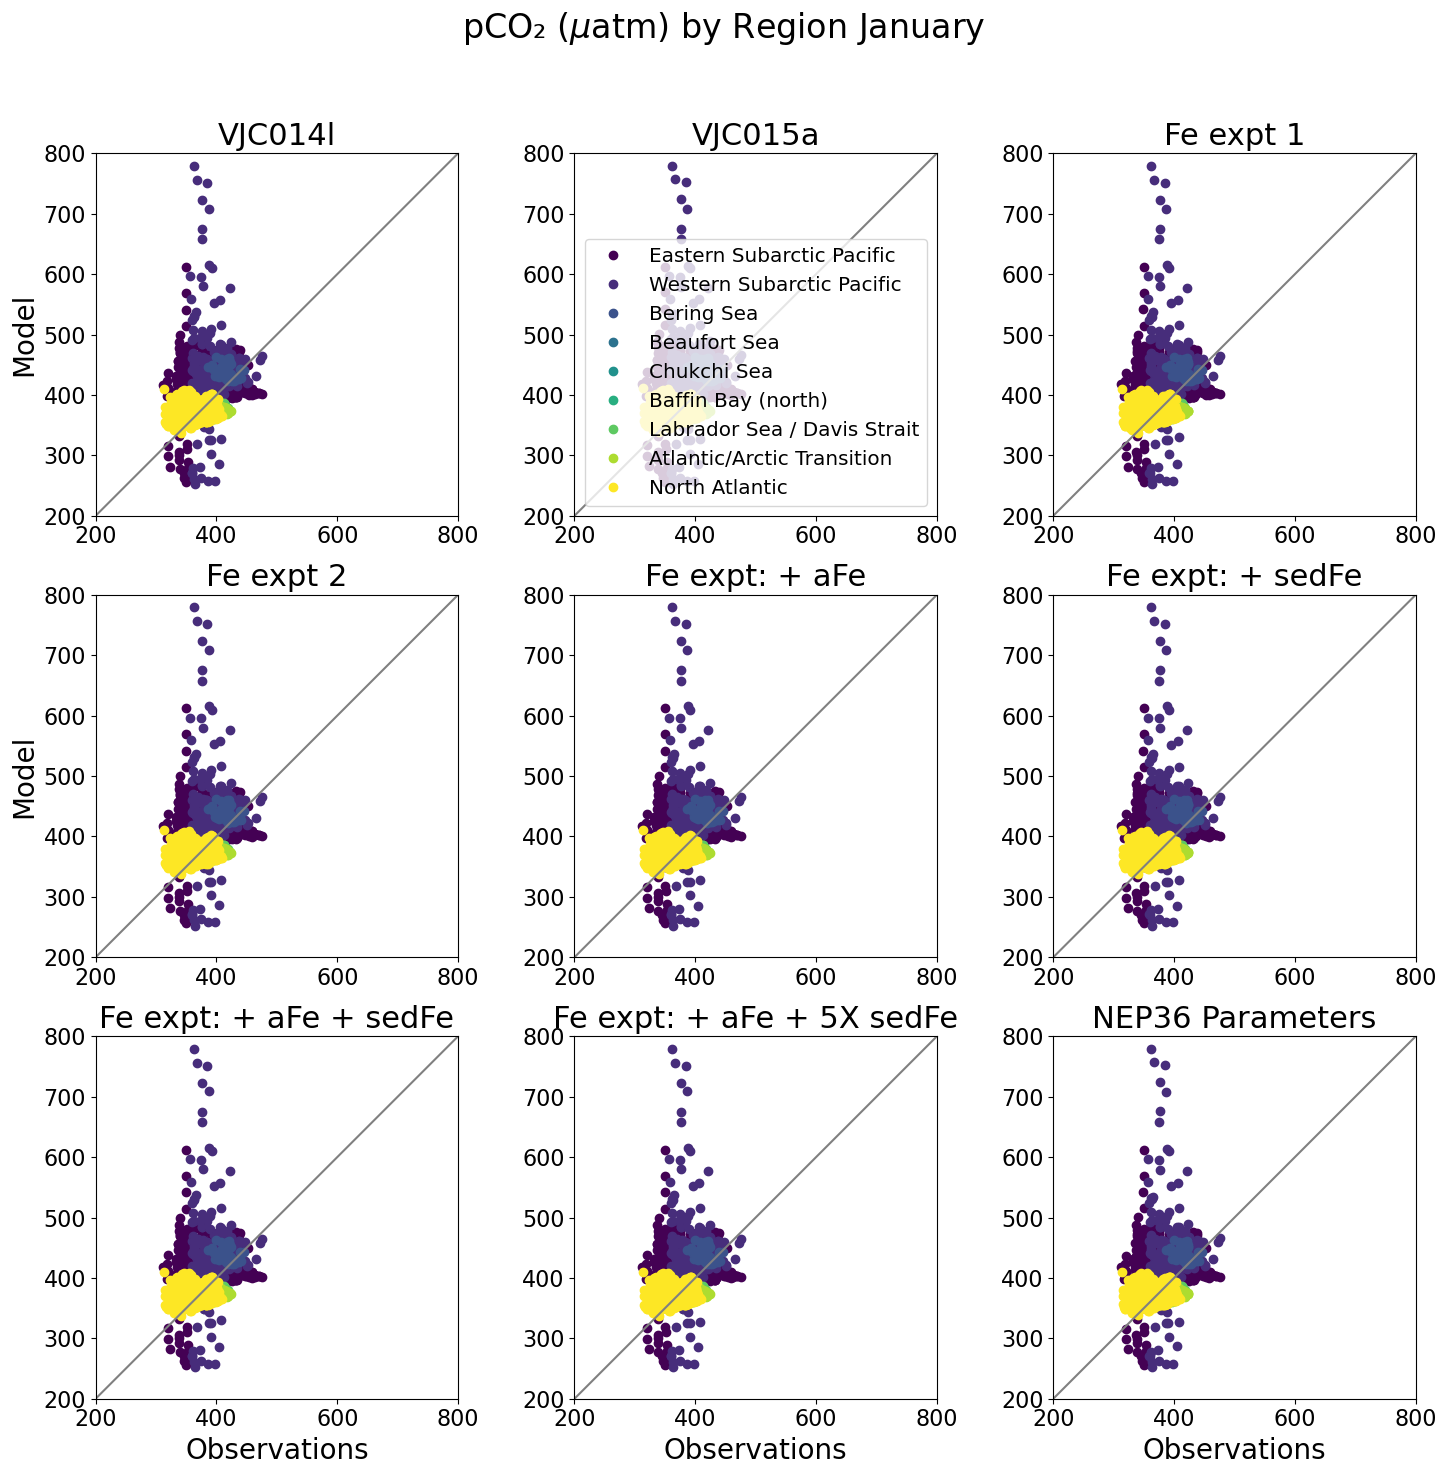

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

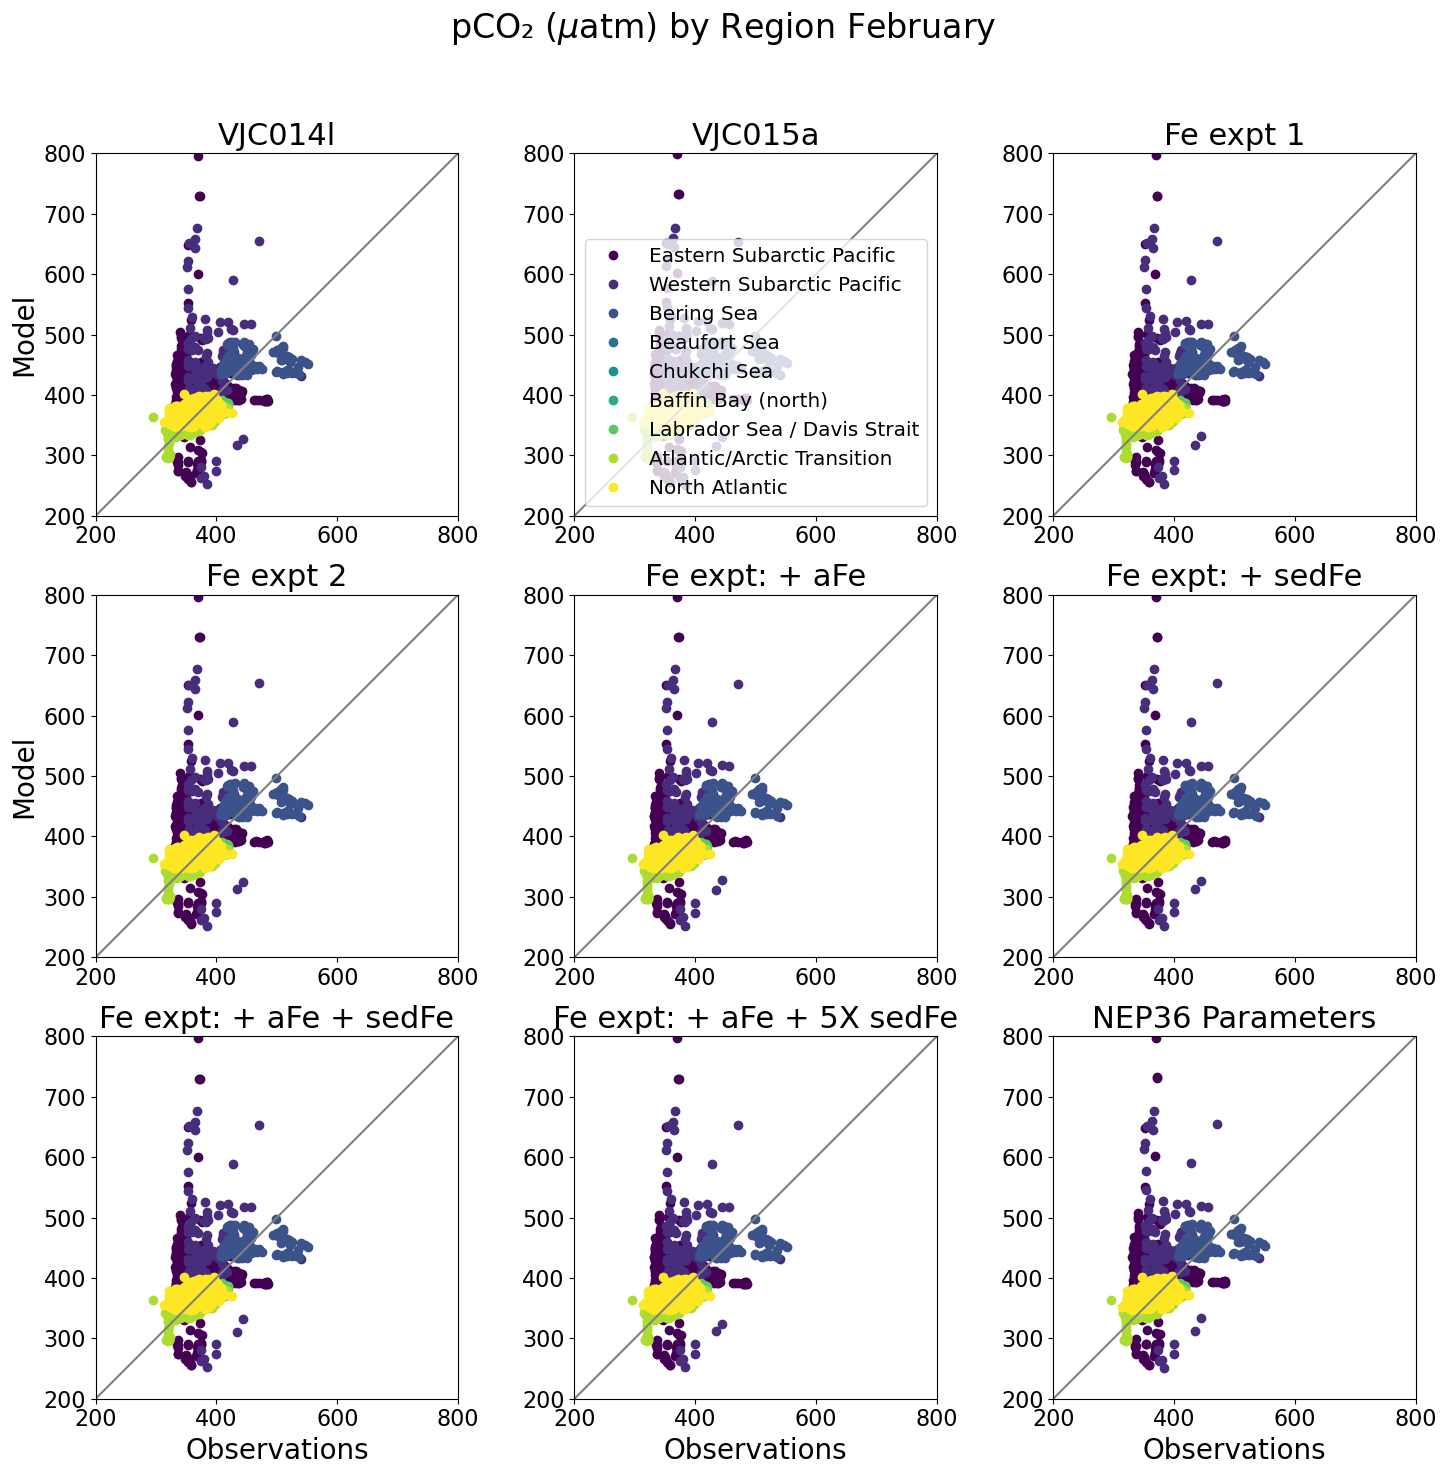

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

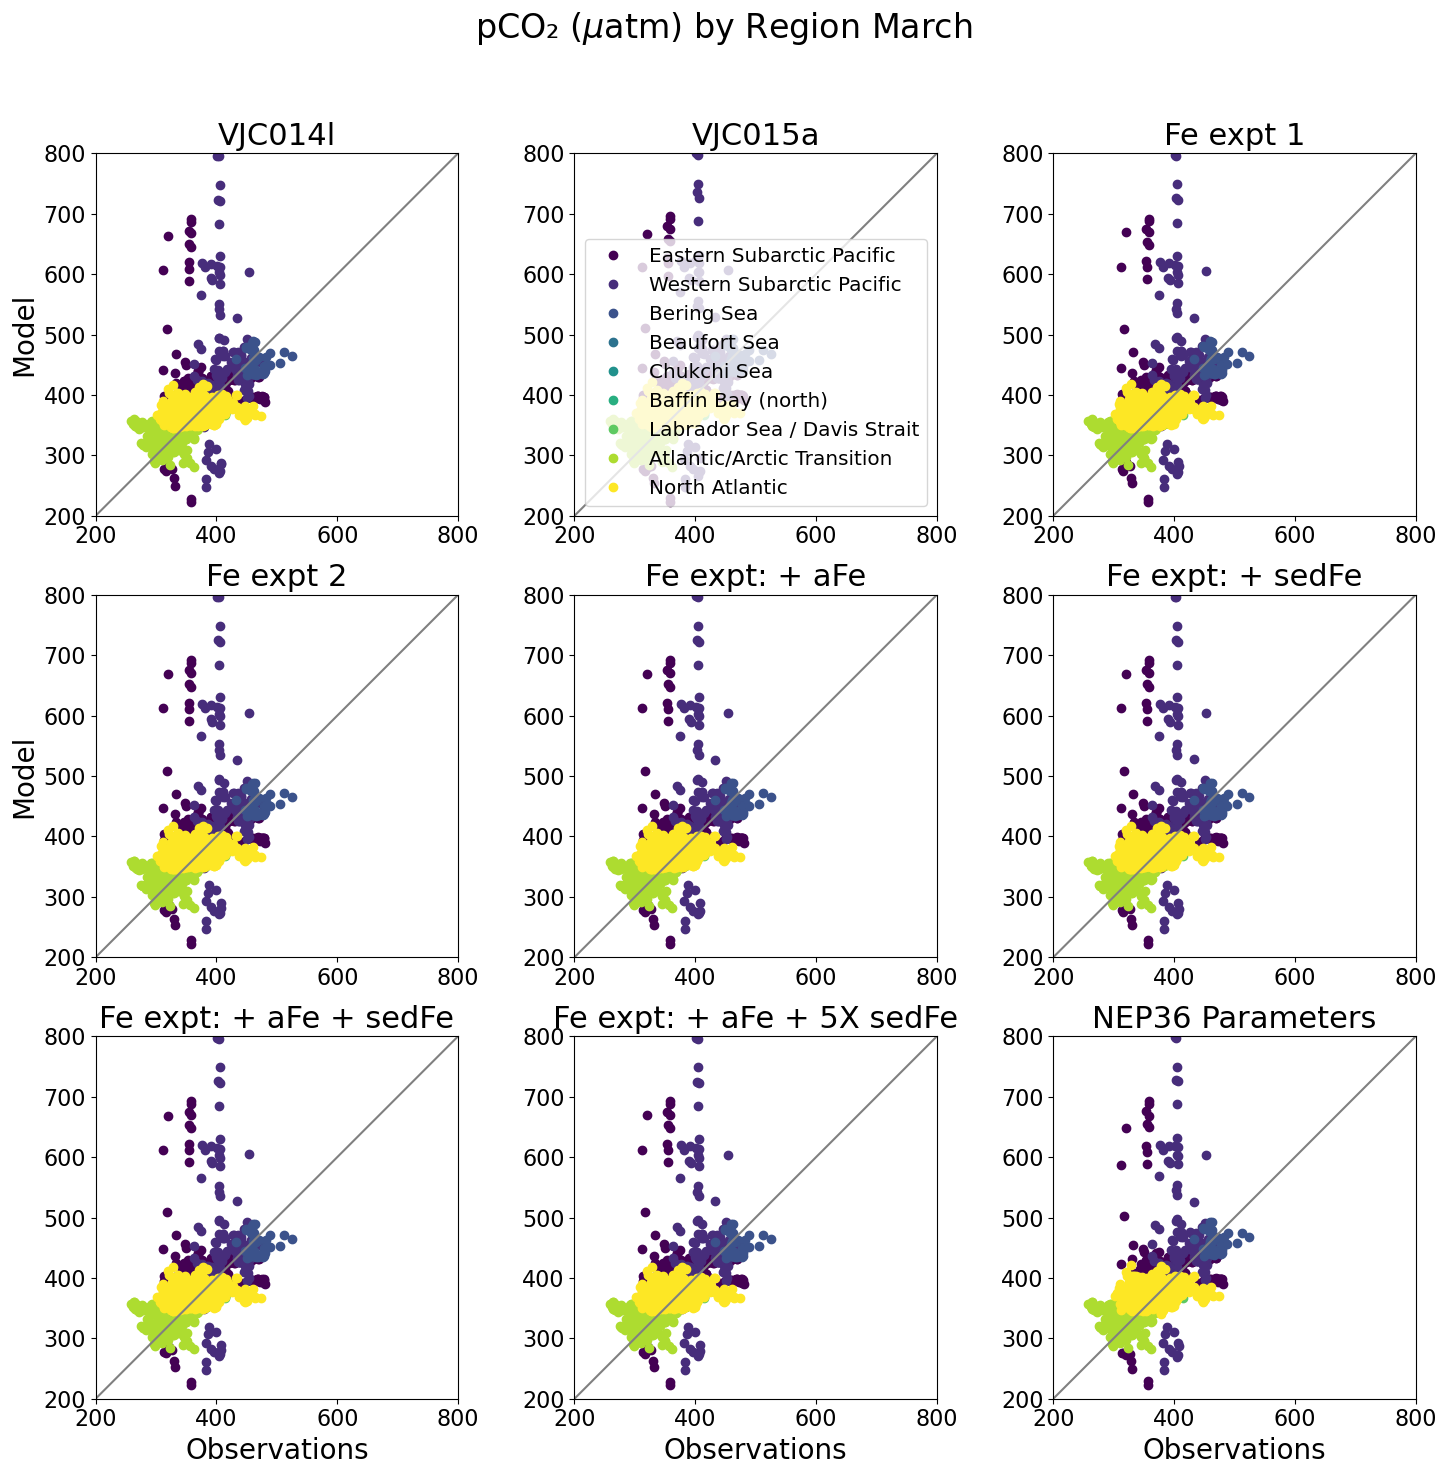

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]


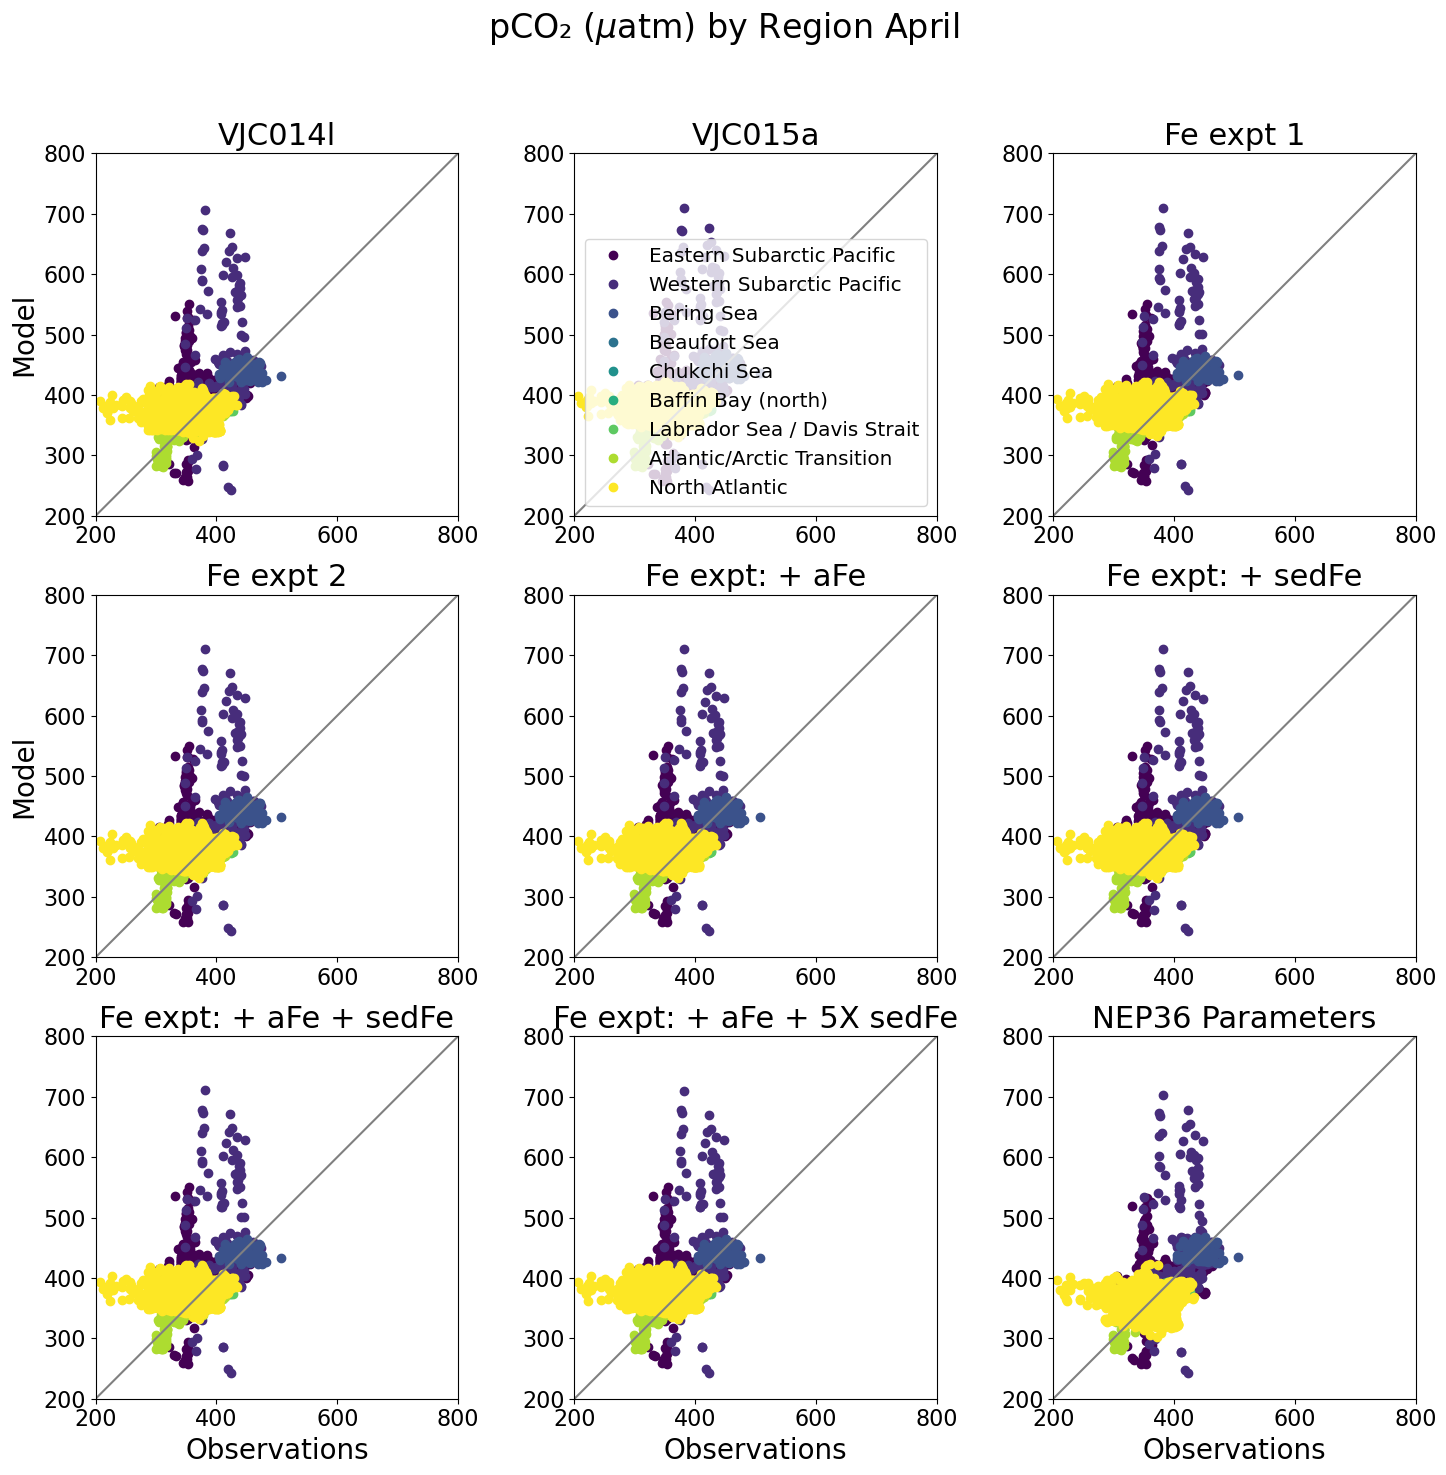

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

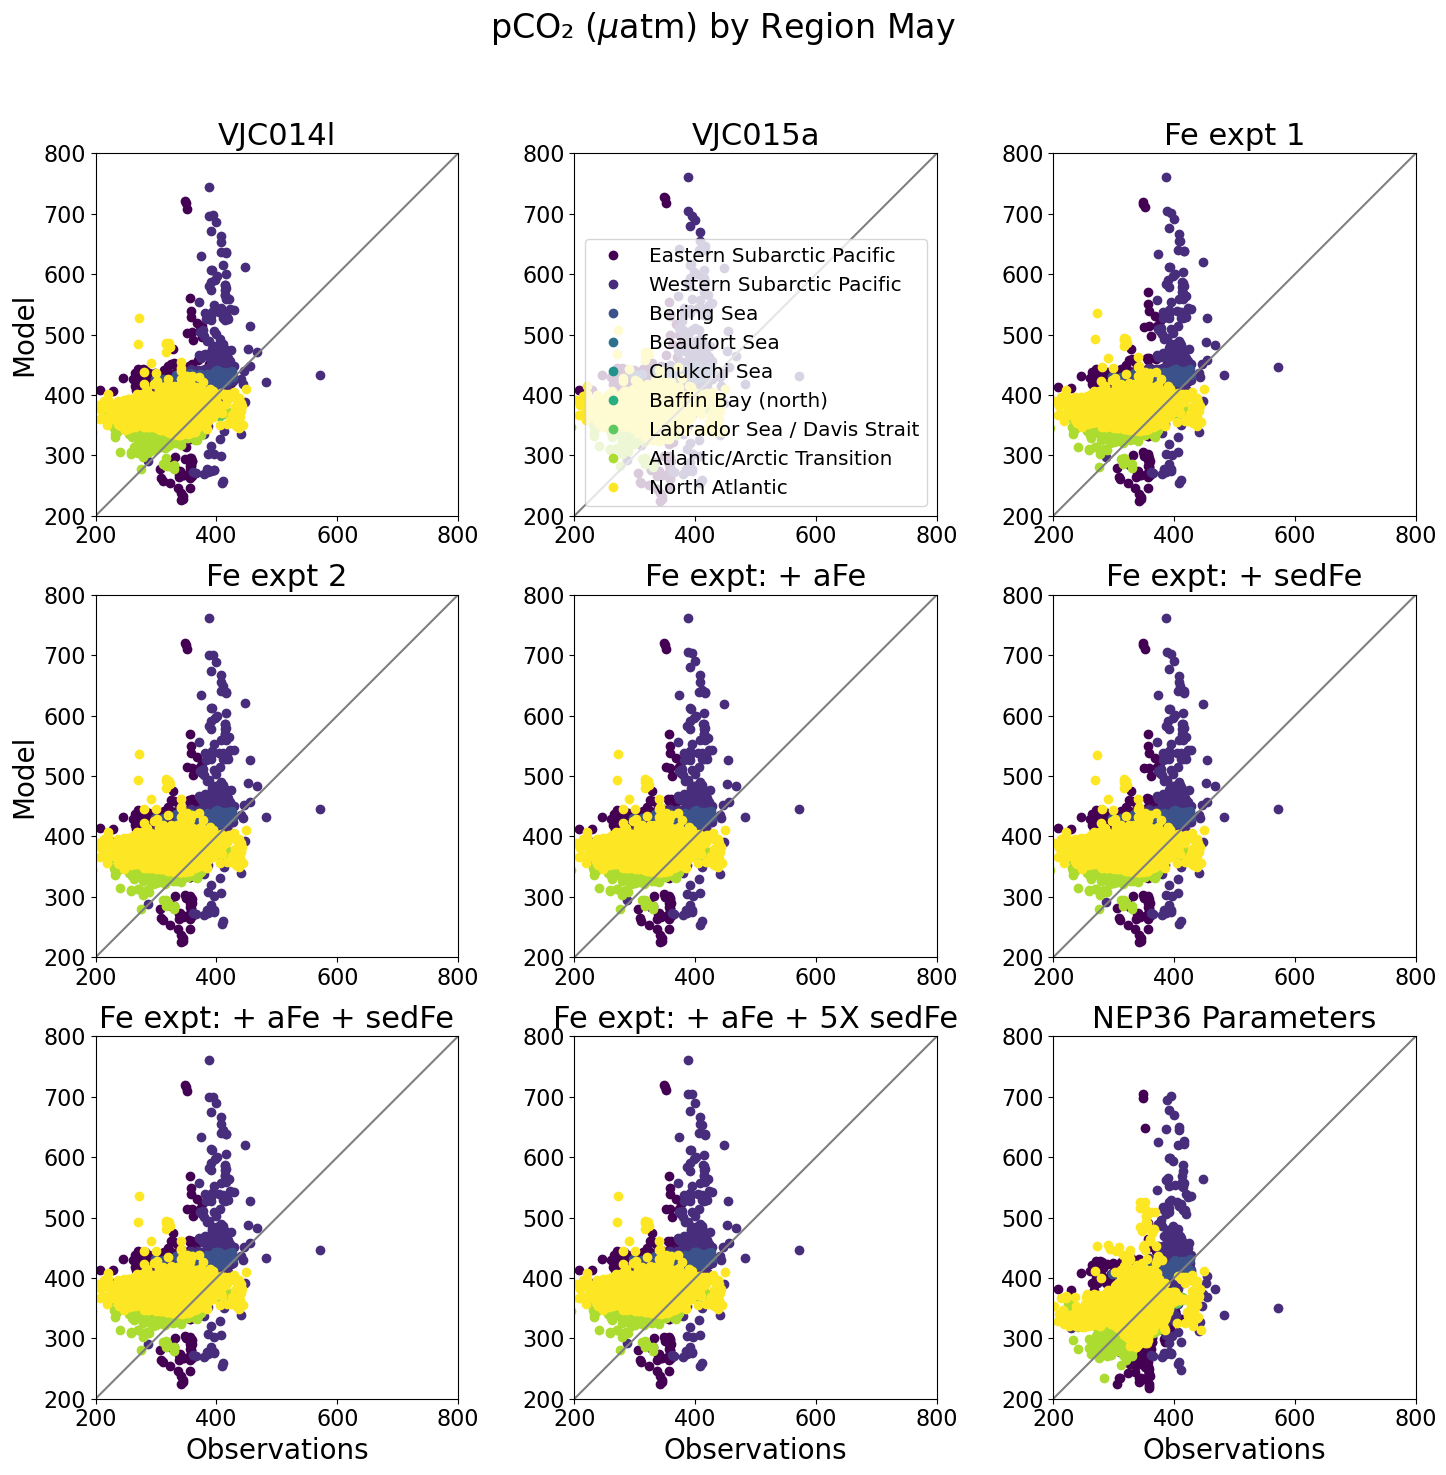

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

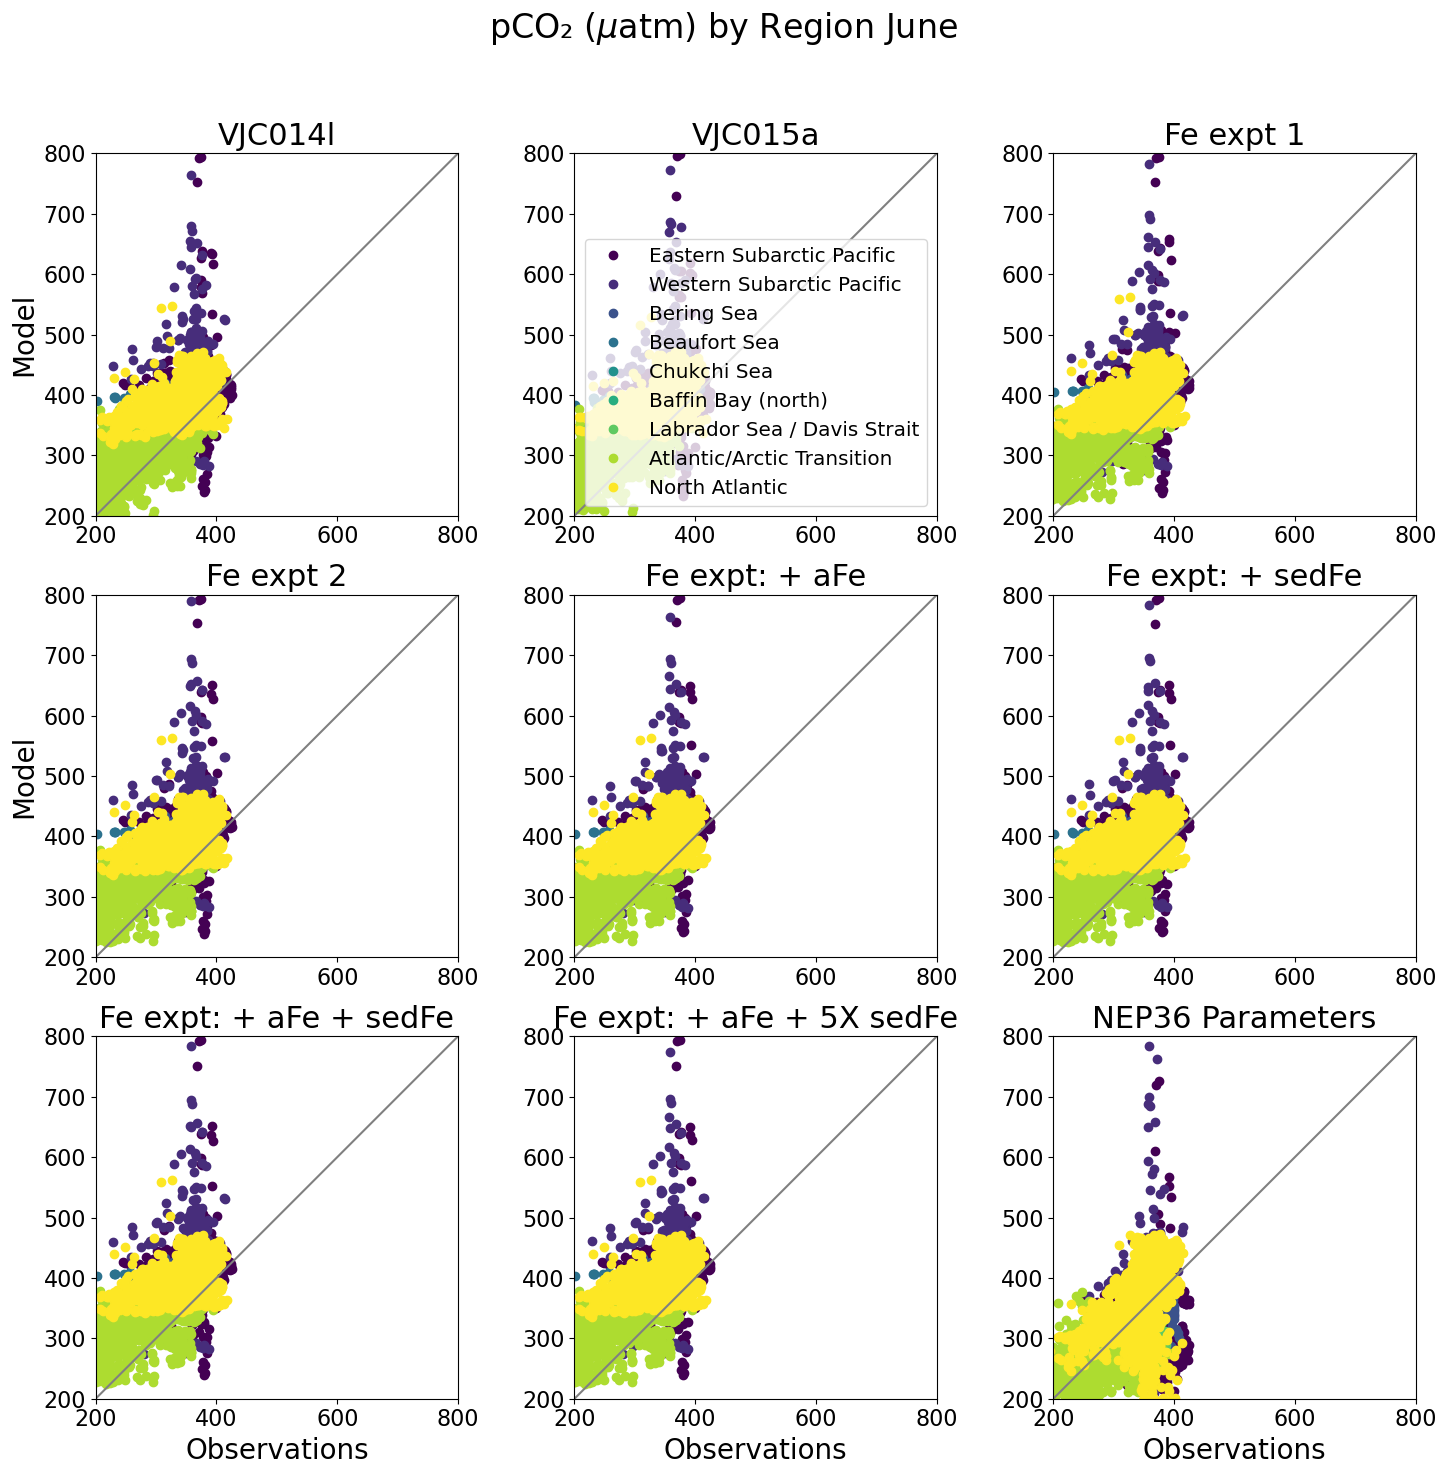

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

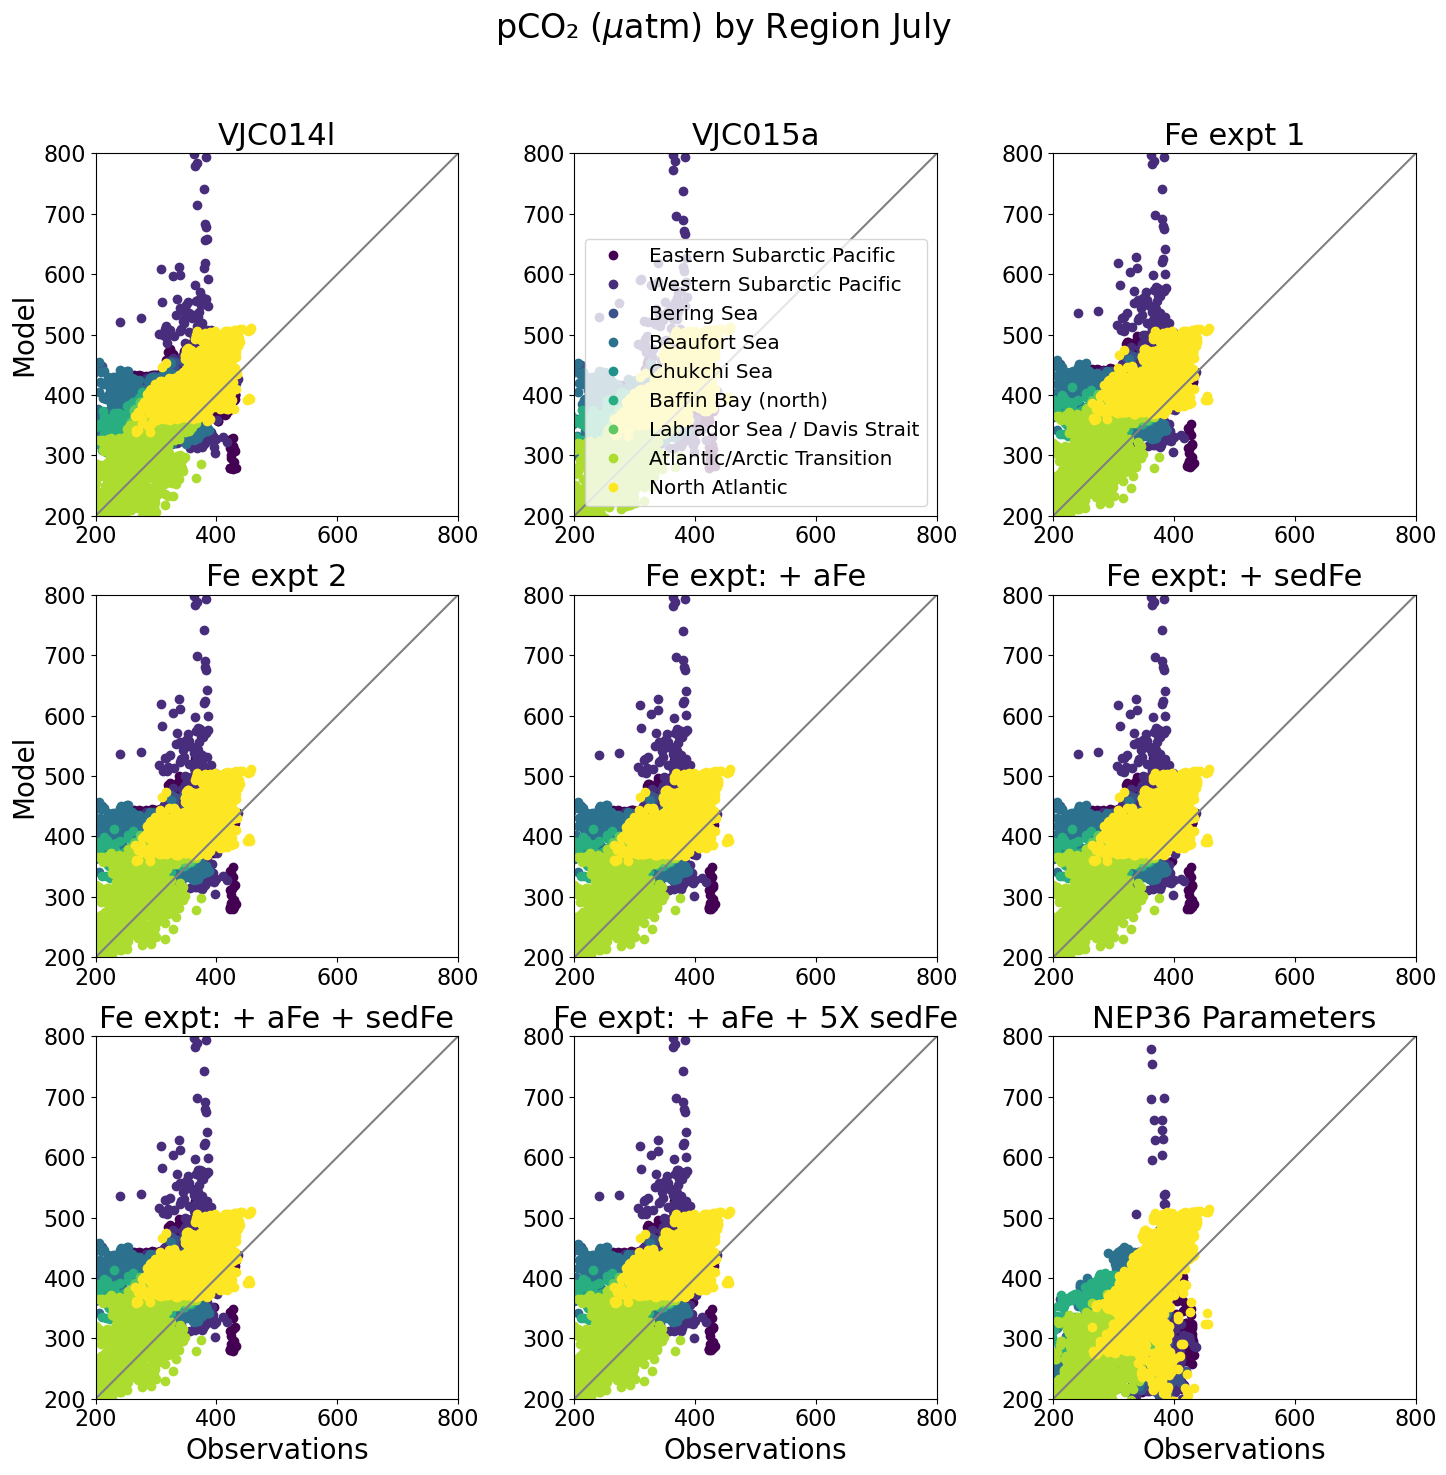

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

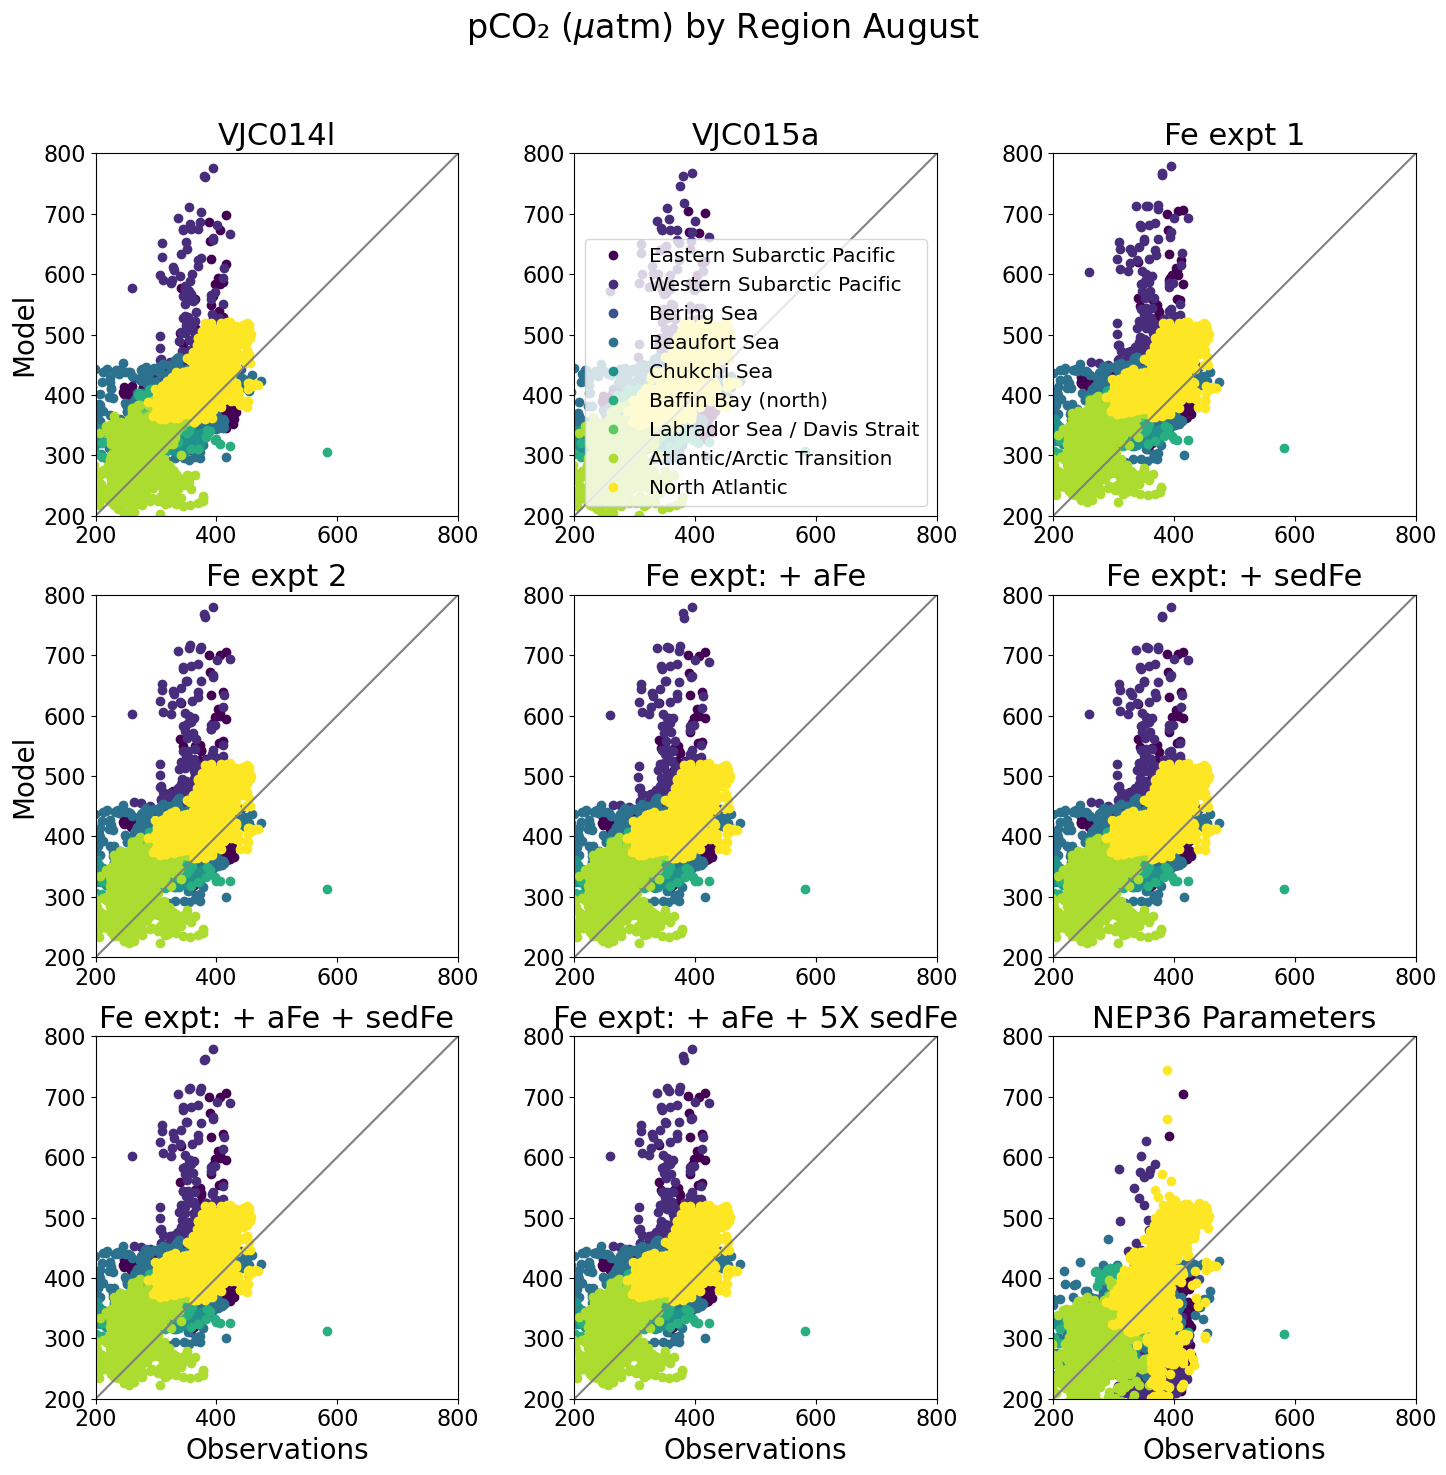

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

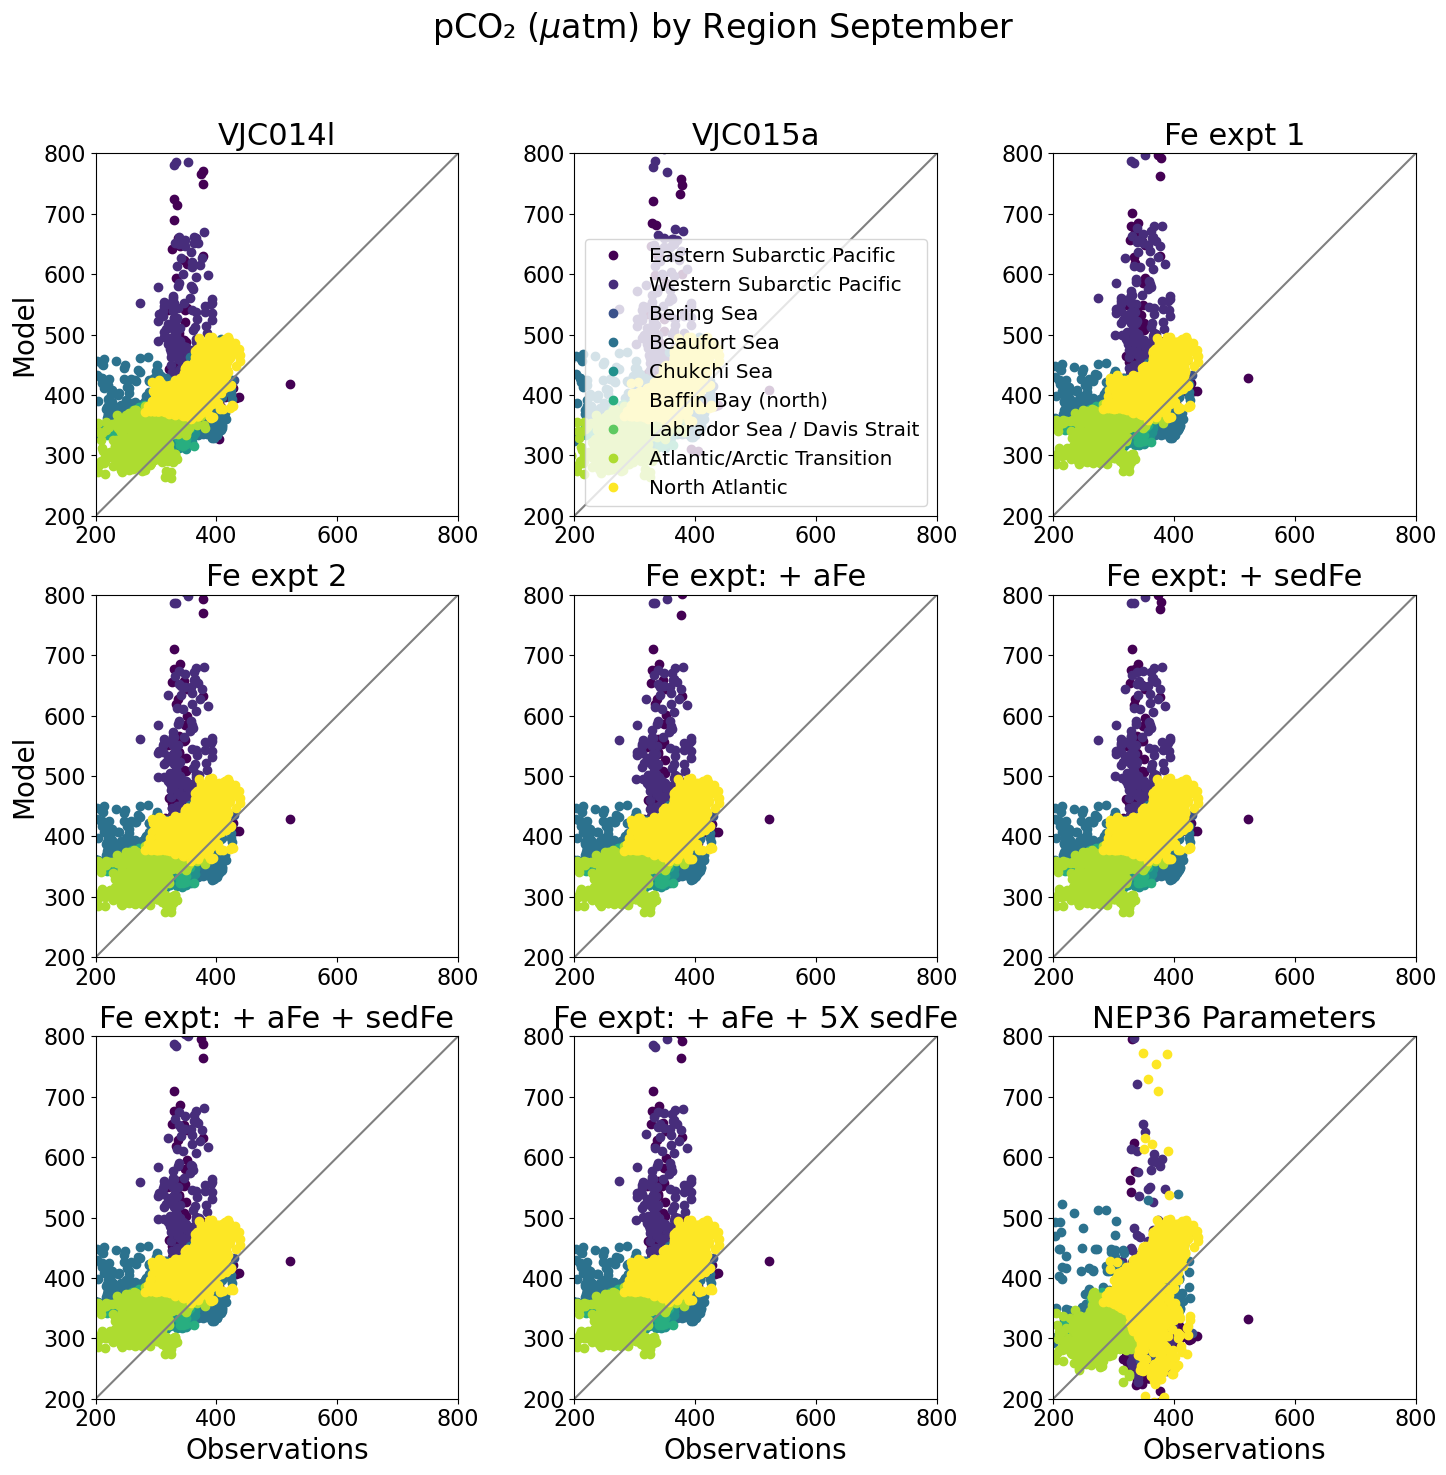

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

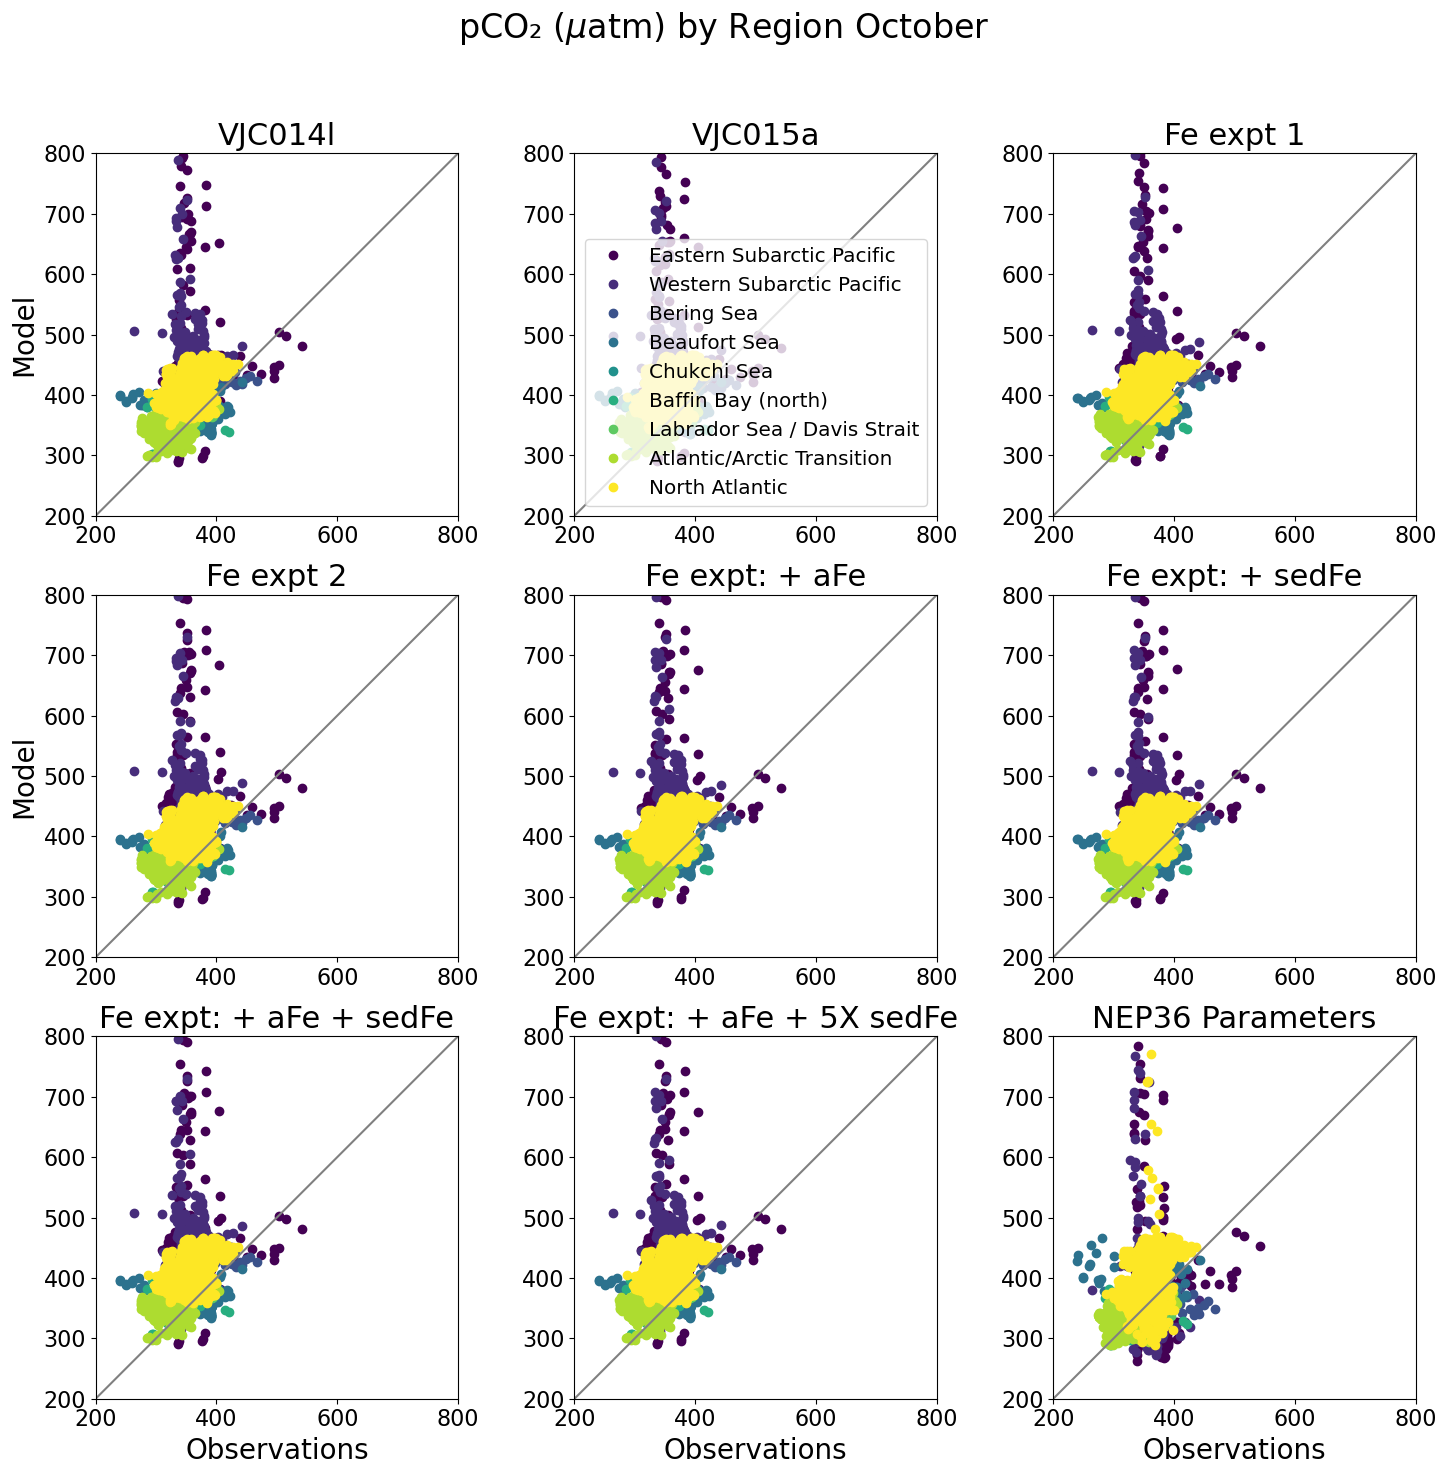

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

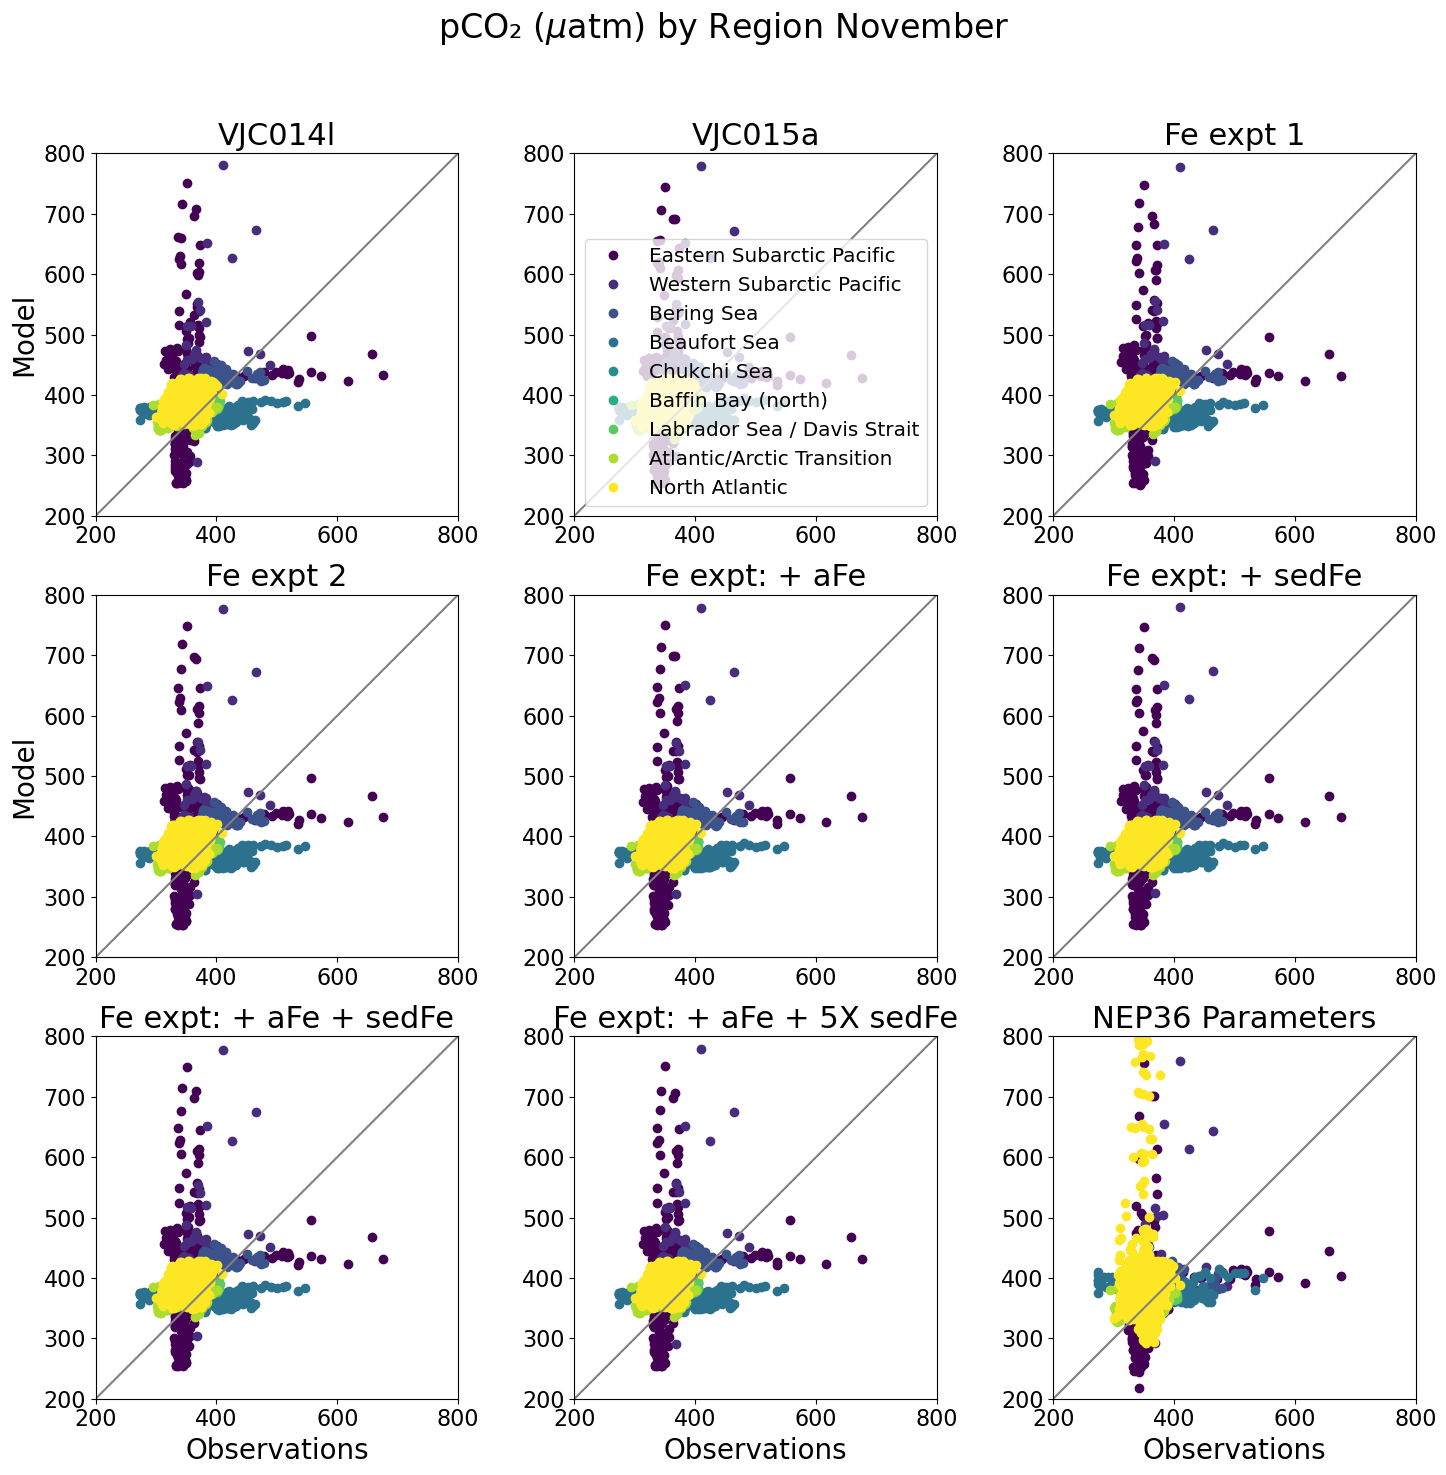

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  modPCO2 = data.variables['pco2'][:]
/tmp/ipykernel_151513/3799324833.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builti

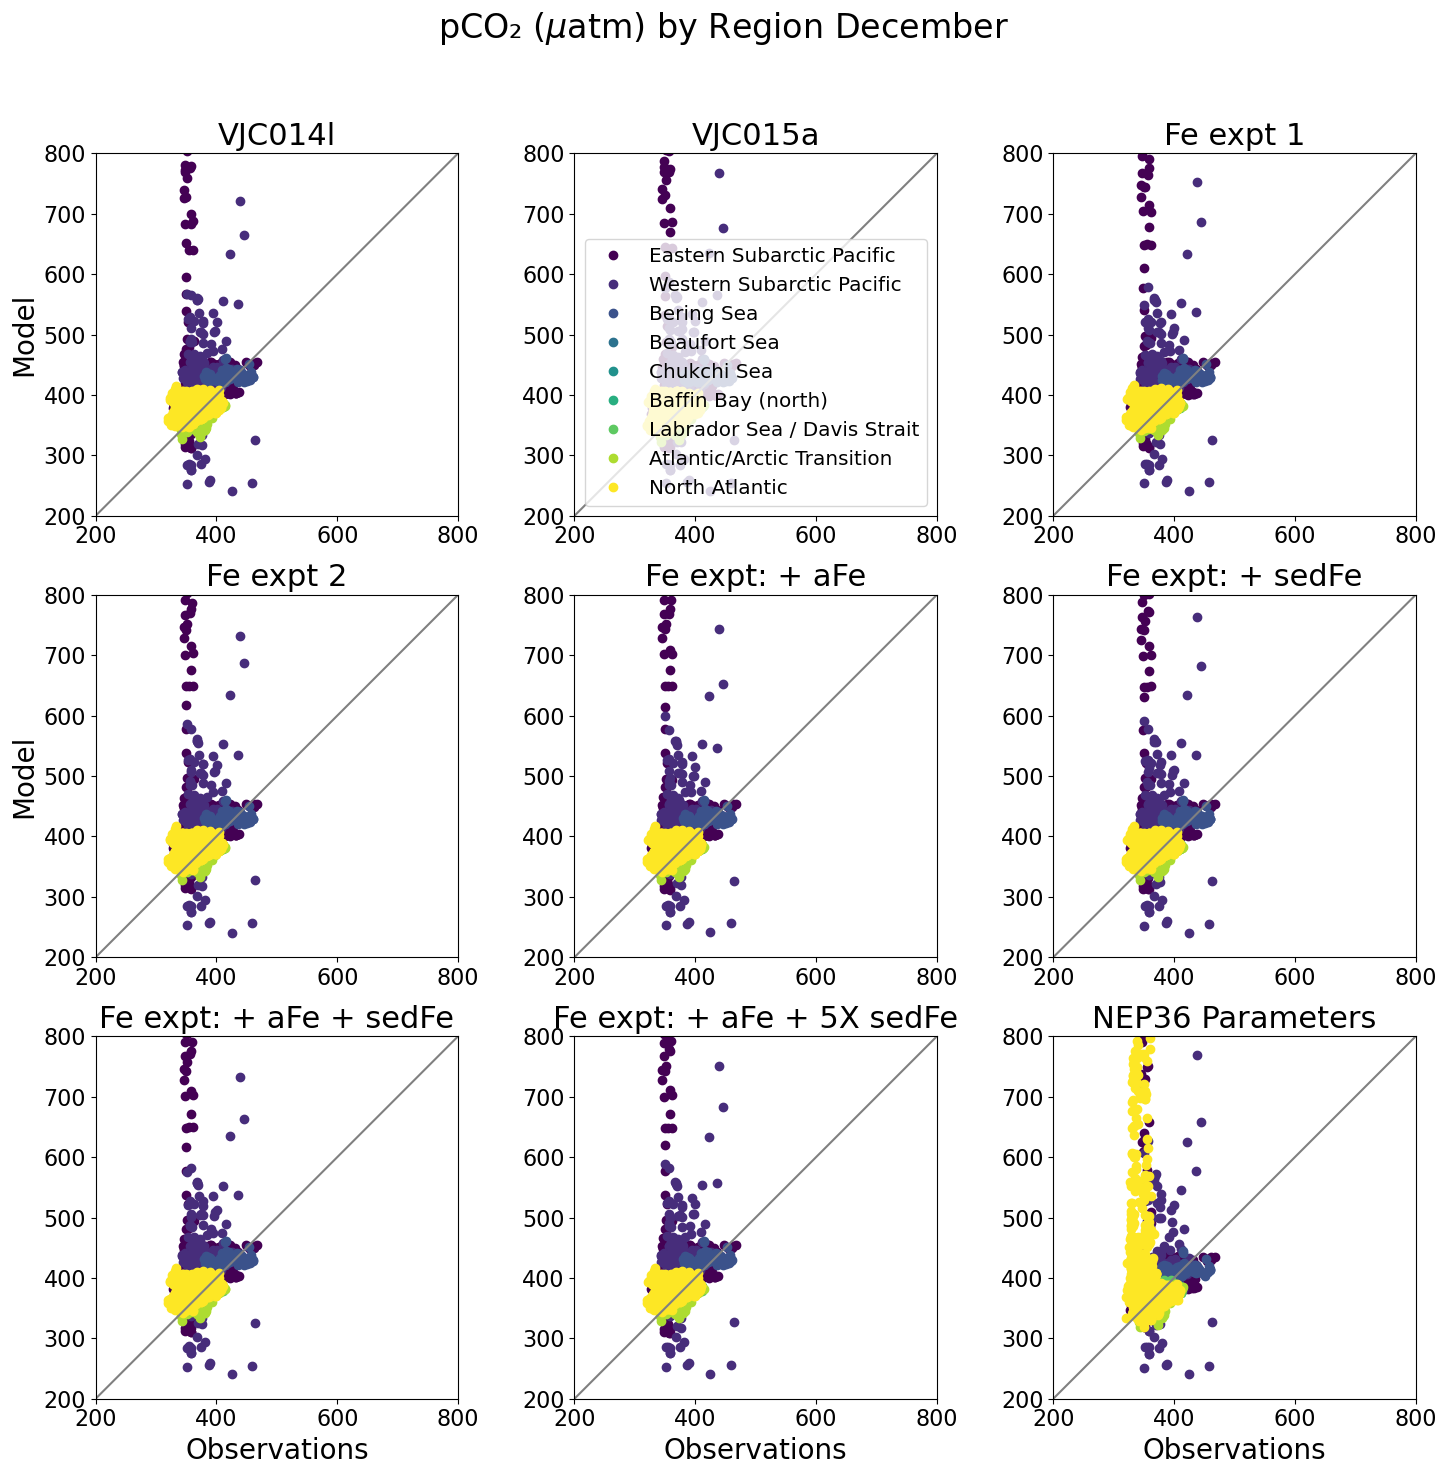

In [7]:
# Presentation quality plot for BioMod Workshop

#fig, axes = plt.subplots(num=1, clear=True, nrows=6, ncols=5, figsize=(30, 20))
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
import itertools
iz = np.arange(10)

months=['January','February','March','April','May','June','July','August','September','October','November','December']
regions = ['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic']
variants = ['-VJC014l','-VJC015a','-VJC015oi','-VJC015ol','-VJC015on','-VJC015or','-VJC015os','-VJC015ot','-VJCnep01']
variantdict = ['VJC014l','VJC015a','Fe expt 1','Fe expt 2','Fe expt: + aFe','Fe expt: + sedFe','Fe expt: + aFe + sedFe',
               'Fe expt: + aFe + 5X sedFe','NEP36 Parameters']

for im, mmon in enumerate(months):
    
    fig, axes = plt.subplots(num=1, clear=True, nrows=3, ncols=3, figsize=(15, 15))
    #fig.suptitle('Mean pCO\u2082 ($\mu$atm) by Region '+mmon, fontsize=24) 
    fig.suptitle('pCO\u2082 ($\mu$atm) by Region '+mmon, fontsize=24) 

    for a, asuff in enumerate(variants):
        cx=plt.subplot(3,3, a+1)
        runid = str('CREG025_LIM3_CANOE'+asuff)
        #print(runid)
        data_all=np.zeros((12,ny,nx))
        flist = glob.glob("/gpfs/fs7/dfo/hpcmc/comda/stod000/CREG25/processed_op/pco2/"+runid+"_monthly_pco2.nc")
        flist.sort()
        #print(flist)
        ifile = 0
        colors =itertools.cycle(plt.get_cmap('viridis')(np.linspace(0,1, 9))) # potential pallettes: hsv, jet, gnuplot

        for i, c in enumerate(regions): 
            
            if i >= 0:
                
                filein = flist[ifile]
                data = Dataset(filein, "r", format="NETCDF4")
                modPCO2 = data.variables['pco2'][:]

                tmaskz=tmask[iz,:,:].flatten()
                ZZ=(np.zeros((10,ny,nx))+regindx).flatten()    # broadcast regions map into a 3D array with same data for each depth
                XOBS=obsPCO2[im,:,:].squeeze().flatten()
                XMOD=modPCO2[im,:,:].squeeze().flatten()
                ii=np.where( ~np.isnan(XOBS) )[0]
                XOBS=XOBS[ii]; XMOD=XMOD[ii]; ZZ=ZZ[ii]; tmaskz=tmaskz[ii];
                jj=np.where( (XOBS>0.) & (ZZ==(i+1)) & (tmaskz==1) )[0]
                #XOBS=np.mean(XOBS[jj]); XMOD=np.mean(XMOD[jj])
                
                colour = next(colors) 
                plt.plot(XOBS[jj], XMOD[jj], "o", color=colour, markeredgecolor=colour, label=regions)

                #plt.plot(XOBS, XMOD, "o", color=colour, markeredgecolor=colour, markersize=15, label=regions)
            
            plt.ylim([200,800]); plt.xlim([200,800])
            cx.tick_params(axis='both', labelsize=16)
            cx.set_aspect(1./cx.get_data_ratio())
            #plt.xticks([200,400,600,800,1000]);plt.yticks([200,400,600,800,1000])
            plt.title(variantdict[a], fontsize=22)

            if a ==1:
                plt.legend(labels=['Eastern Subarctic Pacific', 'Western Subarctic Pacific', 'Bering Sea', 'Beaufort Sea', 'Chukchi Sea', 'Baffin Bay (north)', 'Labrador Sea / Davis Strait', 'Atlantic/Arctic Transition', 'North Atlantic'],
                           fontsize='x-large', loc = 'lower right')
                
            if (a == 0) or (a == 3):
                plt.ylabel("Model", fontsize=20)

            if (a == 6) or (a == 7) or (a == 8):
                plt.xlabel("Observations", fontsize=20)

        cx.plot([0, 1], [0, 1], color='grey', transform=cx.transAxes)
            
    plt.tight_layout(rect=(0,0,1,0.95), w_pad=0)
    plt.show()
    #fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/PresentationFigures/pCO2_FE/pco2_means_month"+str("{:02d}".format(im+1)))
    fig.savefig("/home/fid000/WORK7/ANALYSIS/model_evaluation/FIGURES/PresentationFigures/pCO2_FE/pco2_month"+str("{:02d}".format(im+1)))